Created by Errahum https://github.com/Errahum

Linkedin: https://www.linkedin.com/in/erahum/

Mail: mail@erahum.com

Youtube: https://www.youtube.com/@Errahum

### Objective:
Random walk research and testing

# Data Processing

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pathlib import Path
import importlib.util

# parents[2] refers to the grandparent directory (two levels up)
def dynamic_import(module_name, parent_levels_up=2):
    # Get the absolute path to the parent directory
    current_dir = Path.cwd()
    parent_dir = current_dir.parents[parent_levels_up]
    
    # Define the path to the module
    file_path = parent_dir / 'src' / 'data_management' / f'{module_name}.py'
    data_path = parent_dir / 'data'
    
    # Dynamically import the module
    spec = importlib.util.spec_from_file_location(module_name, str(file_path))
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    
    return module, data_path

# Import the notebook_data_tools module
notebook_data_tools, data_path = dynamic_import('notebook_data_tools')

# Use the imported functions
impute_df = notebook_data_tools.impute_df
delete_duplicates = notebook_data_tools.delete_duplicates

In [6]:
CL = pd.read_csv(data_path / 'extract_transform' / 'CL=F_1d.csv')
CL = CL.drop(['Unnamed: 0'], axis=1)
CL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04 00:00:00,79.629997,81.680000,79.629997,81.510002,81.510002,263542
1,2010-01-05 00:00:00,81.629997,82.000000,80.949997,81.769997,81.769997,258887
2,2010-01-06 00:00:00,81.430000,83.519997,80.849998,83.180000,83.180000,370059
3,2010-01-07 00:00:00,83.199997,83.360001,82.260002,82.660004,82.660004,246632
4,2010-01-08 00:00:00,82.650002,83.470001,81.800003,82.750000,82.750000,310377


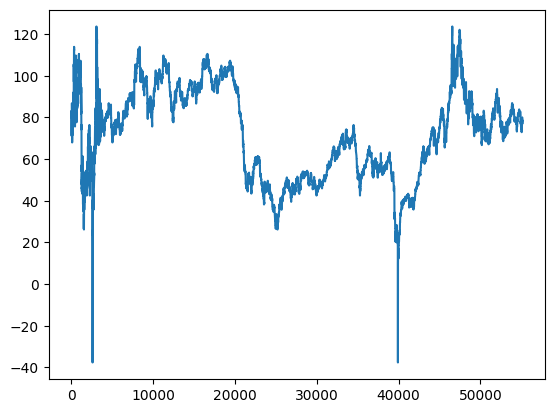

In [7]:
plt.plot(CL['Close'])

In [8]:
CL['Close'].isna().sum()

np.int64(0)

In [9]:
CL = impute_df(CL)
CL = delete_duplicates(CL)
CL['Close'].head()


0    81.510002
1    81.769997
2    83.180000
3    82.660004
4    82.750000
Name: Close, dtype: float64

# Random walk

[ S_{t+1} = S_t + \sigma \epsilon_t ]

Where :

( S_t ) price at ( t ),
( \sigma ) volatility,
( \epsilon_t ) normal variable ( N(0, 1) ).

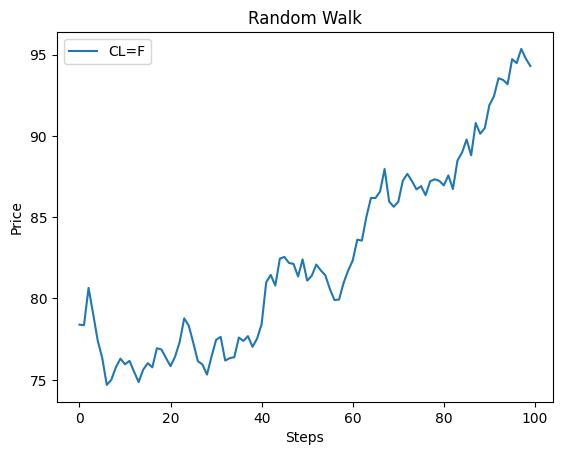

In [12]:
initial_price_at_t = CL['Close'].iloc[-1]
step_number = 100
volatility = 1

# Generate a normal distribution with mean 0 and standard deviation 1
step = np.random.randn(step_number) * volatility
# We will use cumsum to generate a random walk; the cumsum function will add the previous value to the next value
random_walk = initial_price_at_t + np.cumsum(step)

plt.plot(random_walk)
plt.legend(['CL=F', 'Random Walk'])
plt.title('Random Walk')
plt.xlabel('Steps')
plt.ylabel('Price')
plt.show()

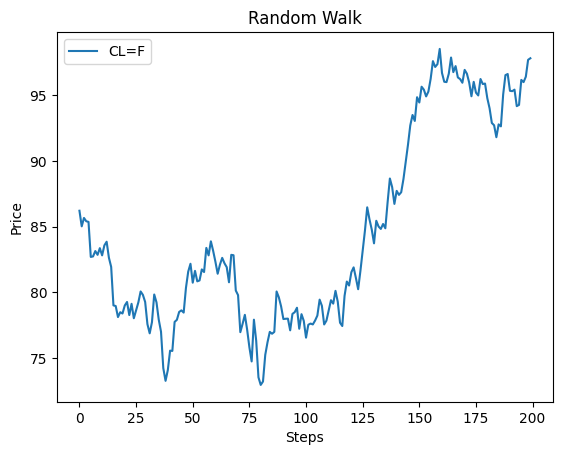

In [18]:
initial_price_at_t = CL['Close'].iloc[-1]
step_number = 100
volatility = 1

# last 100 Close values
last_100_values = CL['Close'].iloc[-100:]

# Generate a normal distribution with mean 0 and standard deviation 1
step = np.random.randn(step_number) * volatility
# We will use cumsum to generate a random walk; the cumsum function will add the previous value to the next value
random_walk = initial_price_at_t + np.cumsum(step)

# Concanate, take last_100_values and at the end put random_walk
combined_values = np.concatenate((last_100_values, random_walk))

plt.plot(combined_values)
plt.legend(['CL=F', 'Random Walk'])
plt.title('Random Walk')
plt.xlabel('Steps')
plt.ylabel('Price')
plt.show()

# Processus wiener Brownian motion

[ W(t) = W(0) + \sum_{i=1}^{n} \Delta W_i ]

où :

( W(t) ) est la valeur du processus de Wiener à l'instant ( t ).
( W(0) ) est la valeur initiale du processus de Wiener (souvent 0).
( \Delta W_i ) sont les incréments du processus de Wiener, qui suivent une distribution normale ( N(0, \sqrt{\Delta t}) ).

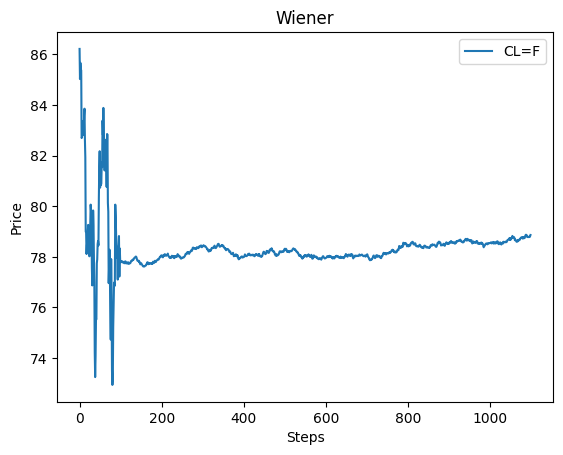

In [25]:
initial_price_at_t = CL['Close'].iloc[-1] # last Close value
step_number = 1000 # 1000 steps
volatility = 1 # 1%
time_horizon = 1 # 1 day

last_100_values = CL['Close'].iloc[-100:] # last 100 Close values

# Normal distribution with mean 0 and standard deviation sqrt(time_horizon / step_number)
step = np.random.randn(step_number) * volatility * np.sqrt(time_horizon / step_number)

random_walk = initial_price_at_t + np.cumsum(step)

combined_values = np.concatenate((last_100_values, random_walk))

plt.plot(combined_values)
plt.legend(['CL=F', 'Wiener'])
plt.title('Wiener')
plt.xlabel('Steps')
plt.ylabel('Price')
plt.show()

`* np.sqrt(time_horizon / step_number)` is added to step to adjusts the standard deviation of the steps to ensure that the random walk approximates a Wiener process over the specified time horizon and number of steps.

In [4]:
# Conversion to PDF
# !jupyter nbconvert --to pdf random_walk.ipynb

# End

Next, we need to find a way to know why the random walk is considered to be one of the best models.
To do that, we need to compare it with anther algorithms like ARMA, ARIMA, SARIMA, Random Forest.

[Models](models.ipynb)